<a href="https://colab.research.google.com/github/zihvvan/DataAnalysis/blob/main/zihvvan/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_(%EC%A0%84%EA%B8%B0%EC%B0%A8_%EC%B6%A9%EC%A0%84%EC%86%8C)_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울특별시 전기차/충전기 데이터분석

![서울특별시](https://imgur.com/CCVvX7e.jpg)
![전기차 충전](https://cdn.pixabay.com/photo/2018/04/15/12/50/car-3321668_1280.png)

## 데이터 및 기능 import

In [ ]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import folium
import matplotlib.ticker as ticker

from google.colab import files
files.upload()

In [ ]:
# 1. 나눔폰트m
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 2. 런타임 재시작 -> 런타임 / 런타임 다시 시작 (Ctrl + M .) 
exit()

In [ ]:
# 3. 기본 폰트를 나.바.고로 세팅
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.pyplot as plt 

In [ ]:
df1 = pd.read_csv('/content/전기차 등록대수.csv')
df1 = df1.set_index('구분')

df2 = pd.read_csv('/content/전기차 충전소.csv')
df2 = df2.set_index('구분')

df3 = pd.read_csv('/content/서울특별시 전기차 충전소.csv')

# display(df1)
# display(df2)

In [ ]:
result = pd.concat([df1, df2], axis=1)

result["2017년"] = result["2017.12.31(사업용)"] + result["2017.12.31(비사업용)"]
result["2018년"] = result["2018.12.31(사업용)"] + result["2018.12.31(비사업용)"]
result["2019년"] = result["2019.12.31(사업용)"] + result["2019.12.31(비사업용)"]
result["2020년"] = result["2020.12.31(사업용)"] + result["2020.12.31(비사업용)"]
result["2021년"] = result["2021.12.31(사업용)"] + result["2021.12.31(비사업용)"]
result["2022년"] = result["2022.12.31(사업용)"] + result["2022.12.31(비사업용)"]

result = result.drop(result.columns[0:12], axis=1)

# display(result)

## 지자체별 전기차 충전기(급속/완속) 갯수

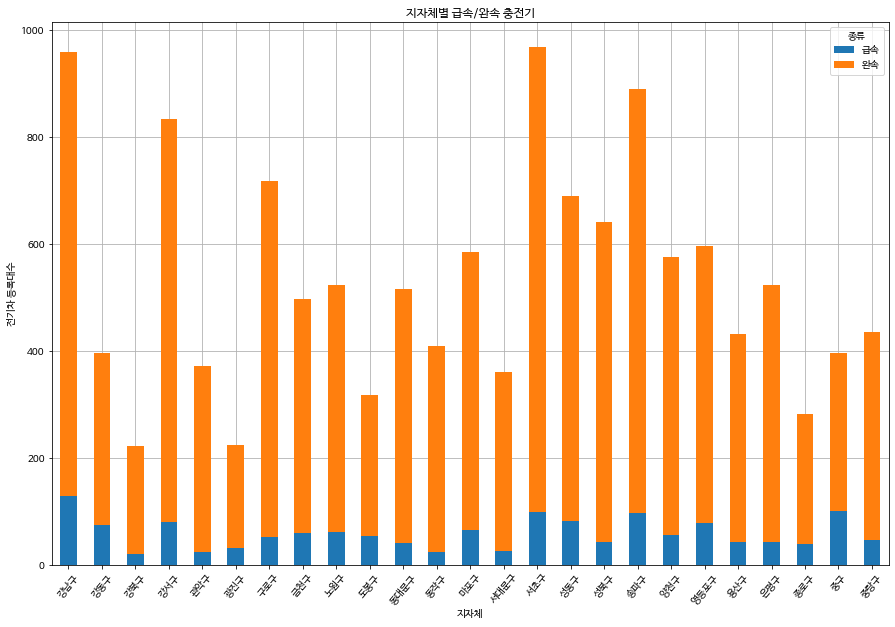

In [ ]:
charger_fast = df2.drop('완속', axis=1)
charger_fast = charger_fast.reset_index()
charger_fast['종류'] = '급속'
charger_fast['순서'] = [x for x in range(1, 51, 2)]
charger_fast.columns = ['지자체', '등록대수', '종류', '순서']
# display(charger_fast)

charger_slow = df2.drop('급속', axis=1)
charger_slow = charger_slow.reset_index()
charger_slow['종류'] = '완속'
charger_slow['순서'] = [x for x in range(2, 51, 2)]
charger_slow.columns = ['지자체', '등록대수', '종류', '순서']
# display(charger_slow)

charger = pd.concat([charger_fast, charger_slow])
charger = charger.sort_values(by='순서')
charger = charger.set_index('순서')
charger = charger.reindex(columns=['지자체', '종류', '등록대수'])
# display(charger)

# 그래프 도식
grouped = charger.groupby(['지자체', '종류'])['등록대수'].sum().reset_index()
charger_graph = grouped.pivot(index='지자체', columns='종류', values='등록대수')
ax = charger_graph.plot(kind='bar', stacked=True, figsize=(15, 10), grid=True)
plt.title('지자체별 급속/완속 충전기')
plt.xlabel('지자체')
plt.ylabel('전기차 등록대수')
plt.legend(title='종류', loc='upper right')
plt.xticks(rotation=50)
ax.set_axisbelow(True)
ax.grid(zorder=0)
plt.show()

## 지자체별 전기차 1,000대당 충전기 갯수

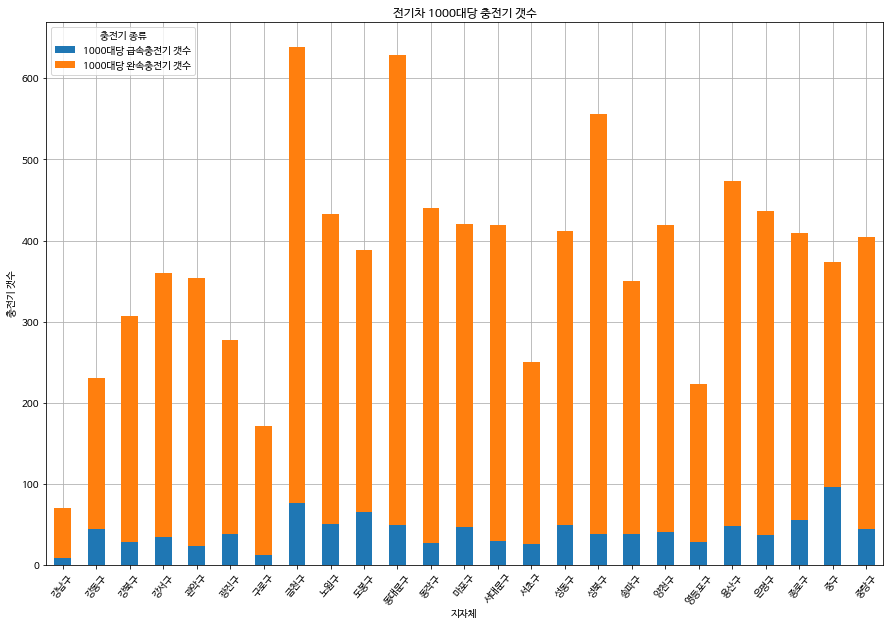

In [ ]:
Charger_per_1000 = df2.copy()

Charger_per_1000["1000대당 급속충전기 갯수"] = df2["급속"] / result["2022년"] * 1000
Charger_per_1000["1000대당 완속충전기 갯수"] = df2["완속"] / result["2022년"] * 1000

Charger_per_1000 = Charger_per_1000.round(0)
Charger_per_1000 = Charger_per_1000.drop(columns=['급속', '완속'])
# display(Charger_per_1000)

map_xy = pd.DataFrame({
    '위도': [37.4959854, 37.5492077, 37.6485578, 37.5509799, 37.4653993, 37.5387106, 37.4954856, 37.4568722, 37.655264, 37.6687757, 37.5756494, 37.5005613, 37.5622906, 37.5820361, 37.4692214, 37.5633419, 37.5891161, 37.5048534, 37.5168723, 37.5265059, 37.532768, 37.6176125, 37.5729993, 37.5634998, 37.6068322],
    '경도': [127.0664091, 127.1464822, 127.0252744, 126.8495382, 126.9438079, 127.0823668, 126.858121, 126.8952295, 127.0771201, 127.0471845, 127.0295582, 126.9635047, 126.9087803, 126.935666, 127.0331894, 127.0371011, 127.0182049, 127.1144822, 126.8662172, 126.8961904, 126.9900218, 126.9227004, 126.979189, 126.9970821, 127.092656],
})
map_xy.set_index(Charger_per_1000.index, inplace=True)
# display(map_xy)


charger_per_1000_fast = Charger_per_1000.drop('1000대당 완속충전기 갯수', axis=1)
charger_per_1000_fast = charger_per_1000_fast.reset_index()
charger_per_1000_fast['충전기 종류'] = '1000대당 급속충전기 갯수'
charger_per_1000_fast['순서'] = [x for x in range(1, 51, 2)]
charger_per_1000_fast.columns = ['지자체', '충전기 갯수', '충전기 종류', '순서']
# display(charger_per_1000_fast)

charger_per_1000_slow = Charger_per_1000.drop('1000대당 급속충전기 갯수', axis=1)
charger_per_1000_slow = charger_per_1000_slow.reset_index()
charger_per_1000_slow['충전기 종류'] = '1000대당 완속충전기 갯수'
charger_per_1000_slow['순서'] = [x for x in range(2, 51, 2)]
charger_per_1000_slow.columns = ['지자체', '충전기 갯수', '충전기 종류', '순서']
# display(charger_per_1000_slow)


charger_per_1000 = pd.concat([charger_per_1000_fast, charger_per_1000_slow])
charger_per_1000 = charger_per_1000.sort_values(by='순서')
charger_per_1000 = charger_per_1000.set_index('순서')
charger_per_1000 = charger_per_1000.reindex(columns=['지자체', '충전기 종류', '충전기 갯수'])
# display(charger_per_1000)

# 그래프 도식
grouped = charger_per_1000.groupby(['지자체', '충전기 종류'])['충전기 갯수'].sum().reset_index()
charger_per_1000_graph = grouped.pivot(index='지자체', columns='충전기 종류', values='충전기 갯수')
ax = charger_per_1000_graph.plot(kind='bar', stacked=True, figsize=(15, 10), grid=True)
plt.title('전기차 1000대당 충전기 갯수')
plt.xlabel('지자체')
plt.ylabel('충전기 갯수')
plt.legend(title='충전기 종류', loc='upper left')
plt.xticks(rotation=50)
ax.set_axisbelow(True)
ax.grid(zorder=0)
plt.show()

## 서울특별시 연도별 전기차 등록대수(사업자/비사업자)

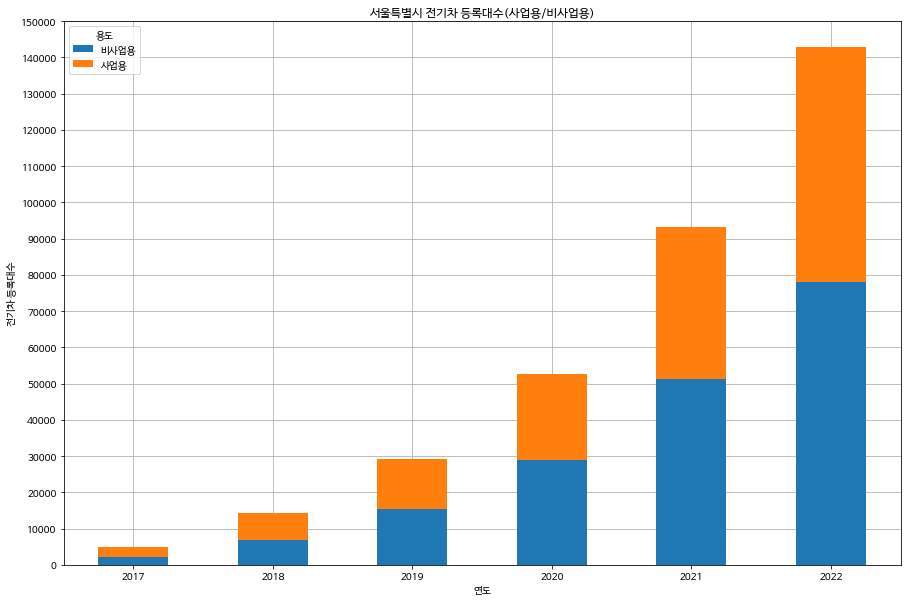

In [ ]:
df1_seoul = pd.DataFrame(index=[0], columns=list(range(0,12)))
df1_seoul = pd.DataFrame(columns=df1.columns)
df1_seoul.loc[len(df1_seoul)] = [None]*12
df1_seoul = df1.sum().to_frame().transpose()
df1_seoul.index = ['등록대수']
# display(df1_seoul)

df1_seoul_consumer = df1_seoul.drop(df1_seoul.columns[::2], axis=1)
df1_seoul_consumer.columns = [str(year) for year in range(2017, 2023)]
df1_seoul_consumer = df1_seoul_consumer.T
df1_seoul_consumer['용도'] = '비사업용'
df1_seoul_consumer['구분'] = [x for x in range(1, 12, 2)]
df1_seoul_consumer.reset_index(inplace=True)
df1_seoul_consumer = df1_seoul_consumer.rename(columns={'index': '연도'})
# display(df1_seoul_consumer)

df1_seoul_business = df1_seoul.drop(df1_seoul.columns[1::2], axis=1)
df1_seoul_business.columns = [str(year) for year in range(2017, 2023)]
df1_seoul_business = df1_seoul_business.T
df1_seoul_business['용도'] = '사업용'
df1_seoul_business['구분'] = [x for x in range(2, 13, 2)]
df1_seoul_business.reset_index(inplace=True)
df1_seoul_business = df1_seoul_business.rename(columns={'index': '연도'})
# display(df1_seoul_business)

df1_seoul = pd.concat([df1_seoul_business, df1_seoul_consumer])
df1_seoul = df1_seoul.sort_values(by='구분')
df1_seoul = df1_seoul.set_index('구분')
df1_seoul = df1_seoul.reindex(columns=['연도', '용도', '등록대수'])
# display(df1_seoul)

# 그래프 도식 - 전기차 등록대수(사업용/비사업용)
grouped = df1_seoul.groupby(['연도', '용도']).sum().groupby(level=[1]).cumsum().reset_index()
df1_seoul_graph = grouped.pivot(index='연도', columns='용도', values='등록대수')
ax = df1_seoul_graph.plot(kind='bar', stacked=True, figsize=(15, 10), grid=True)
plt.title('서울특별시 전기차 등록대수(사업용/비사업용)')
plt.xlabel('연도')
plt.ylabel('전기차 등록대수')
plt.legend(title='용도', loc='upper left')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.set_axisbelow(True)
ax.grid(zorder=0)
plt.show()

## 서울특별시 전기차 충전기 위치 및 개수

In [ ]:
map = folium.Map(location=[37.566345, 126.977893], zoom_start=12, width='%100', height='%100')
locations = list(zip(df3.lat, df5.lon))
from folium import plugins
cluster = plugins.MarkerCluster(locations=locations, popups=df3["addr"].tolist())
map.add_child(cluster)
display(map)